In [143]:
import numpy as np
from matplotlib import pyplot as plt
import xarray
import gsw
import xarray as xr
from ctd2xray import cchdo
%matplotlib inline

In [144]:
target_pressure = np.arange(5.,6000.,10.)
# load dataset as a directory full of netcdf files
ds = cchdo.open_cchdo_as_mfdataset('data/s04p_320620110219_nc_ctd/*.nc',target_pressure)
ds #this is for the 2011 cruise: https://cchdo.ucsd.edu/cruise/320620110219

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 139)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
    longitude         (time) float64 168.1 168.4 168.4 168.5 168.6 169.1 ...
  * time              (time) datetime64[ns] 2011-02-22T21:12:00 ...
    latitude          (time) float64 -70.65 -70.5 -70.47 -70.44 -70.36 -70.1 ...
Data variables:
    woce_time         (time) int32 2112 9 212 513 947 1415 1917 106 645 1926 ...
    temperature_i     (time, pressure_i) float64 -1.363 -1.256 -1.203 -1.171 ...
    oxygen_i          (time, pressure_i) float64 320.2 320.2 320.2 319.9 ...
    pressure_QC_i     (time, pressure_i) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    woce_date         (time) int32 20110222 20110223 20110223 20110223 ...
    salinity_i        (time, pressure_i) float64 34.13 34.2 34.24 34.26 ...
    cast              (time) |S40 '1' '1' '1' '1' '2' '1' '1' '1' '2' '1' ...
    station           (time) |S40 '2' '3' '4' '

In [145]:
# swap the order of those dimensions
ds = ds.transpose('pressure_i', 'time')

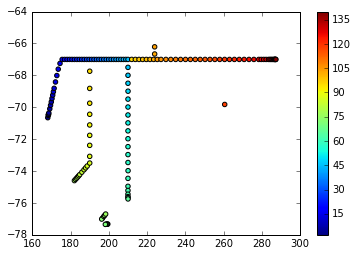

In [146]:
lon = ds.longitude
lon[lon<0] += 360
plt.scatter(lon, ds.latitude, c=ds.station)
plt.colorbar()

In [147]:
p_2d = ds.pressure_i + 0*ds.temperature_i
lon_2d = (ds.longitude + 0*ds.temperature_i).T
lat_2d = (ds.latitude + 0*ds.temperature_i).T

t = ds.temperature_i.data.ravel()
SP = ds.salinity_i.data.ravel()
p = p_2d.data.ravel()
lon = lon_2d.data.ravel()
lat = lat_2d.data.ravel()

SA = gsw.SA_from_SP(SP, p, lon, lat)
CT = gsw.CT_from_t(SA, t, p)
rho = gsw.rho(SA, CT, p)

ds['SA'] = xr.DataArray(SA.reshape(ds.temperature_i.shape),
             dims=ds.temperature_i.dims,
             coords=ds.temperature_i.coords)
ds['CT'] = xr.DataArray(CT.reshape(ds.temperature_i.shape),
             dims=ds.temperature_i.dims,
             coords=ds.temperature_i.coords)
ds['rho'] = xr.DataArray(rho.reshape(ds.temperature_i.shape),
             dims=ds.temperature_i.dims,
             coords=ds.temperature_i.coords)

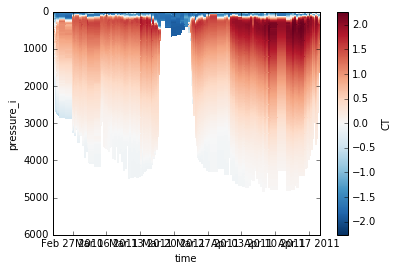

In [149]:
ds.CT.plot(yincrease=False)

In [150]:
slice1 = ds.isel(time=slice(0,44))
slice2 = ds.isel(time=slice(94,101))
slice3 = ds.isel(time=slice(103,116))
slice4 = ds.isel(time=slice(117,None))

section = xr.concat([slice1, slice2, slice3, slice4], dim='time')
section

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 86)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
    longitude         (time) float64 168.1 168.4 168.4 168.5 168.6 169.1 ...
  * time              (time) datetime64[ns] 2011-02-22T21:12:00 ...
    latitude          (time) float64 -70.65 -70.5 -70.47 -70.44 -70.36 -70.1 ...
Data variables:
    woce_time         (time) int32 2112 9 212 513 947 1415 1917 106 645 1926 ...
    rho               (pressure_i, time) float64 1.027e+03 1.028e+03 ...
    temperature_i     (pressure_i, time) float64 -1.363 -1.218 -1.298 -1.342 ...
    oxygen_i          (pressure_i, time) float64 320.2 338.8 340.6 343.0 ...
    salinity_i        (pressure_i, time) float64 34.13 34.17 34.14 34.12 ...
    CT                (pressure_i, time) float64 -1.359 -1.215 -1.294 -1.339 ...
    woce_date         (time) int32 20110222 20110223 20110223 20110223 ...
    pressure_QC_i     (pressure_i, time) float64 2.0

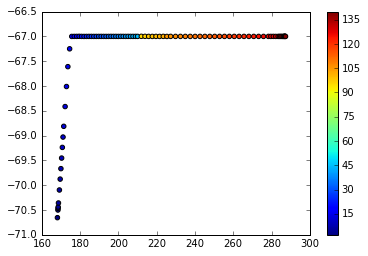

In [151]:
plt.scatter(section.longitude, section.latitude, c=section.station)
plt.colorbar()

In [152]:
import netCDF4
section.to_netcdf('section.nc')

In [153]:
target_pressure = np.arange(5.,6000.,10.)
# load dataset as a directory full of netcdf files
ds2 = cchdo.open_cchdo_as_mfdataset('data/s04p_nc_ctd/*.nc',target_pressure)
ds2 #this is for the 1992 cruise in the same location: https://cchdo.ucsd.edu/cruise/90KDIOFFE6_1

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 113)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
    longitude         (time) float64 -70.09 -71.12 -72.0 -72.26 -72.26 ...
  * time              (time) datetime64[ns] 1992-02-22T20:33:00 ...
    latitude          (time) float64 -67.47 -67.17 -66.89 -66.81 -66.78 ...
Data variables:
    woce_time         (time) int32 2033 2344 1054 1912 2206 247 711 1225 ...
    temperature_i     (time, pressure_i) float64 -0.04955 -0.05035 -0.02605 ...
    oxygen_i          (time, pressure_i) float64 357.1 321.6 318.0 306.6 ...
    pressure_QC_i     (time, pressure_i) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    woce_date         (time) int32 19920222 19920222 19920223 19920223 ...
    salinity_i        (time, pressure_i) float64 33.31 33.31 33.35 33.64 ...
    cast              (time) |S40 '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' ...
    station           (time) |S40 '682' '683' '684' '685' 

In [154]:
# swap the order of those dimensions
ds2 = ds2.transpose('pressure_i', 'time')

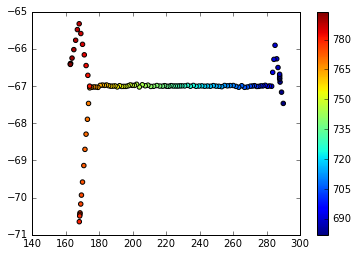

In [155]:
lon2 = ds2.longitude
lon2[lon2<0] += 360.
plt.scatter(lon2, ds2.latitude, c=ds2.station)
plt.colorbar()

In [162]:
p_2d2 = ds2.pressure_i + 0*ds2.temperature_i
lon_2d2 = (ds2.longitude + 0*ds2.temperature_i).T
lat_2d2 = (ds2.latitude + 0*ds2.temperature_i).T

t2 = ds2.temperature_i.data.ravel()
SP2 = ds2.salinity_i.data.ravel()
p2 = p_2d2.data.ravel()
lon2 = lon_2d2.data.ravel()
lat2 = lat_2d2.data.ravel()

SA2 = gsw.SA_from_SP(SP2, p2, lon2, lat2)
CT2 = gsw.CT_from_t(SA2, t2, p2)
rho2 = gsw.rho(SA2, CT2, p2)

ds2['SA'] = xr.DataArray(SA2.reshape(ds2.temperature_i.shape),
             dims=ds2.temperature_i.dims,
             coords=ds2.temperature_i.coords)
ds2['CT'] = xr.DataArray(CT2.reshape(ds2.temperature_i.shape),
             dims=ds2.temperature_i.dims,
             coords=ds2.temperature_i.coords)
ds2['rho'] = xr.DataArray(rho2.reshape(ds2.temperature_i.shape),
             dims=ds2.temperature_i.dims,
             coords=ds2.temperature_i.coords)

In [164]:
section2 = ds2.isel(time=slice(0,99))
section2

<xarray.Dataset>
Dimensions:           (pressure_i: 600, time: 99)
Coordinates:
  * pressure_i        (pressure_i) float64 5.0 15.0 25.0 35.0 45.0 55.0 65.0 ...
    longitude         (time) float64 289.9 288.9 288.0 287.7 287.7 287.8 ...
  * time              (time) datetime64[ns] 1992-02-22T20:33:00 ...
    latitude          (time) float64 -67.47 -67.17 -66.89 -66.81 -66.78 ...
Data variables:
    woce_time         (time) int32 2033 2344 1054 1912 2206 247 711 1225 ...
    temperature_i     (pressure_i, time) float64 -0.04955 0.271 -0.1117 ...
    oxygen_i          (pressure_i, time) float64 357.1 360.2 352.5 346.8 ...
    pressure_QC_i     (pressure_i, time) float64 2.0 2.0 2.0 2.0 2.0 2.0 2.0 ...
    woce_date         (time) int32 19920222 19920222 19920223 19920223 ...
    salinity_i        (pressure_i, time) float64 33.31 33.43 33.54 33.55 ...
    cast              (time) |S40 '1' '1' '1' '1' '1' '2' '1' '1' '1' '1' ...
    station           (time) |S40 '682' '683' '684' '685' '68

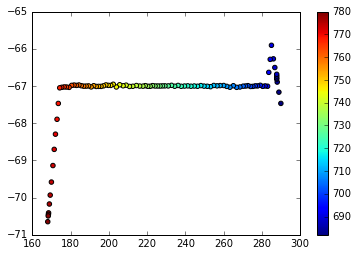

In [165]:
plt.scatter(section2.longitude, section2.latitude, c=section2.station)
plt.colorbar()

In [166]:
section2.to_netcdf('section2.nc')

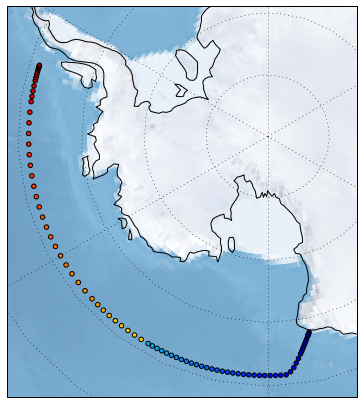

In [175]:
import cartopy.crs as ccrs
from cartopy.io.img_tiles import GoogleTiles
from cartopy.io.img_tiles import OSM
import cartopy.feature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

fig,ax=plt.subplots()
fig.set_size_inches(10,7)
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([160, 300, -75, -65], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.stock_img()
ax.scatter(section.longitude,section.latitude,c=section.station,transform=ccrs.PlateCarree())

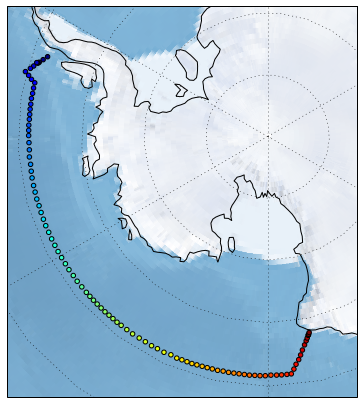

In [161]:
fig,ax=plt.subplots()
fig.set_size_inches(10,7)
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([160, 300, -75, -65], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.stock_img()
ax.scatter(section2.longitude,section2.latitude,c=section2.station,transform=ccrs.PlateCarree())

In [222]:
#import the ACC lat/lon data from MATLAB file
import scipy.io
mat = scipy.io.loadmat('bsn_southernfronts.mat')
bsn_pf=mat['bsn_pf']
lon=bsn_pf[0,0:968]
lat=bsn_pf[1,0:968]
bsn_saccf=mat['bsn_saccf']
lon2=bsn_saccf[0,0:913]
lat2=bsn_saccf[1,0:913]
bsn_saf=mat['bsn_saf']
lon3=bsn_saf[0,0:1080]
lat3=bsn_saf[1,0:1080]
bsn_stf=mat['bsn_stf']
lon4=bsn_stf[0,0:328]
lat4=bsn_stf[1,0:328]

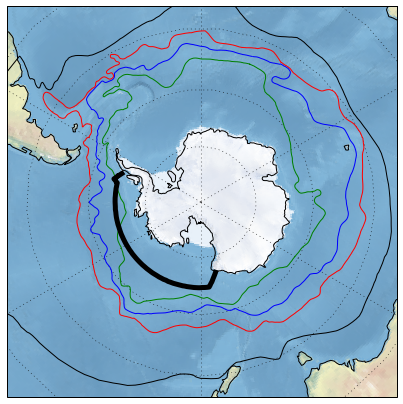

In [228]:
fig,ax=plt.subplots()
fig.set_size_inches(10,7)
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([1, 300, -75, -40], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.stock_img()
ax.plot(lon,lat,c='b',transform=ccrs.PlateCarree())
ax.plot(lon2,lat2,c='g',transform=ccrs.PlateCarree())
ax.plot(lon3,lat3,c='r',transform=ccrs.PlateCarree())
ax.plot(lon4,lat4,c='k',transform=ccrs.PlateCarree())
ax.plot(section2.longitude,section2.latitude,c='k',linewidth=5,transform=ccrs.PlateCarree())

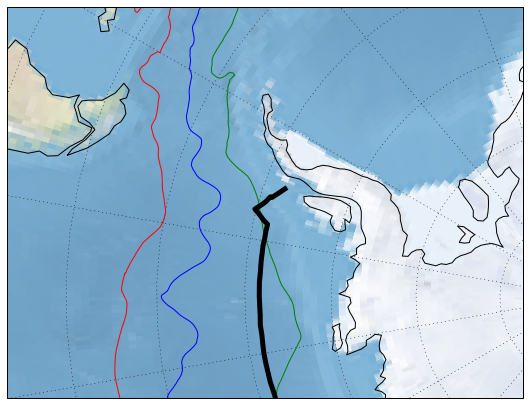

In [236]:
fig,ax=plt.subplots()
fig.set_size_inches(10,7)
ax = plt.axes(projection=ccrs.SouthPolarStereo())
ax.set_extent([260, 300, -85, -50], crs=ccrs.PlateCarree())
ax.coastlines()
ax.gridlines()
ax.stock_img()
ax.plot(lon,lat,c='b',transform=ccrs.PlateCarree())
ax.plot(lon2,lat2,c='g',transform=ccrs.PlateCarree())
ax.plot(lon3,lat3,c='r',transform=ccrs.PlateCarree())
ax.plot(lon4,lat4,c='k',transform=ccrs.PlateCarree())
ax.plot(section2.longitude,section2.latitude,c='k',linewidth=5,transform=ccrs.PlateCarree())